In [9]:
import warnings
warnings.filterwarnings('ignore')

차원축소 모델 비교
- PCA : 정방행렬(m * m), 공분산, 고유값, 고유벡터, 고유값의 크기로 주성분 결정
- LDV : 클래스간 분산을 최대한 크게 클래스내 분산은 작게 표현
- SVD : m * n, 행렬을 U, Σ 및 V^T의 세 가지 개별 행렬로 분해 행렬 Σ는 양수, 0 또는 음수일 수 있는 특이값을 포함
- NMF : 음수가 아닌 행렬을 두 개의 음수가 아닌 행렬인 W와 H로 분해. W와 H는 둘 다 음수가 아닌 요소로 구성

SVD 개요

In [3]:
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(11)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[ 1.749 -0.286 -0.485 -2.653]
 [-0.008 -0.32  -0.537  0.315]
 [ 0.421 -1.066 -0.886 -0.476]
 [ 0.69   0.561 -1.306 -1.119]]


In [4]:
# U, V 에 속한 벡터는 특이벡터, Sigma는 대각행렬
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.859 -0.319  0.333 -0.223]
 [ 0.014  0.493 -0.072 -0.867]
 [-0.261  0.792  0.364  0.416]
 [-0.44   0.169 -0.867  0.161]]
Sigma Value:
 [3.693 1.39  1.182 0.115]
V transpose matrix:
 [[-0.519  0.074  0.329  0.786]
 [-0.08  -0.586 -0.743  0.313]
 [ 0.116 -0.8    0.581 -0.091]
 [-0.843 -0.1   -0.051 -0.526]]


In [5]:
# sigma를 다시 0을 포함한 대각행렬로 변환
# 대각행렬은 대칭행렬의 부분집합. 즉 모든 대각행렬은 대칭이지만 모든 대칭행렬이 대각행렬은 아니다
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3)) # 원래대로 돌아옴 (?)

[[ 1.749 -0.286 -0.485 -2.653]
 [-0.008 -0.32  -0.537  0.315]
 [ 0.421 -1.066 -0.886 -0.476]
 [ 0.69   0.561 -1.306 -1.119]]


In [6]:
Sigma_mat

array([[3.6926972 , 0.        , 0.        , 0.        ],
       [0.        , 1.39011466, 0.        , 0.        ],
       [0.        , 0.        , 1.18248959, 0.        ],
       [0.        , 0.        , 0.        , 0.11453705]])

In [7]:
a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[ 1.749 -0.286 -0.485 -2.653]
 [-0.008 -0.32  -0.537  0.315]
 [ 1.741 -0.606 -1.021 -2.338]
 [ 1.749 -0.286 -0.485 -2.653]]


In [8]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [5.517 0.893 0.    0.   ]


In [1]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬:\n',matrix)
U,Sigma,Vt = svd(matrix,full_matrices=False)
print('\n 분해 행렬 차원: ', U.shape, Sigma.shape,Vt.shape)
print('\n Sigma값 행렬:',Sigma)

num_comonents = 4
U_tr,Sigma_tr,Vt_tr = svds(matrix, k=num_comonents)
print('\n Truncated SVD 분해 행렬 차원: ',U_tr.shape, Sigma_tr.shape,Vt_tr.shape)
print('\n Truncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)),Vt_tr)

print('\n Truncated SVD로 분해 후 복원 행렬: \n ', matrix_tr)

원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원:  (6, 6) (6,) (6, 6)

 Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

 Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD로 분해 후 복원 행렬: 
  [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7

In [2]:
# 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 SVD와 PCA는 동일한 변환을 수행한다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 Truncated SVD변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig,(ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1],c=iris.target)

NameError: name 'iris_ftrs' is not defined

### NMF(Non-negative Matrix Factorization)

- 기계 학습 및 데이터 마이닝에서 자주 사용되는 차원 감소 기술입니다. PCA(Principal Component Analysis) 및 SVD(Singular Value Decomposition)와 비슷하지만 모든 요소가 음수가 아니어야 한다는 제약이 있습니다.

- NMF의 핵심 아이디어는 원본 데이터 매트릭스를 음수가 아닌 두 개의 매트릭스로 분해하여 원본 데이터의 필수 기능을 캡처하지만 차원을 축소하는 것입니다.

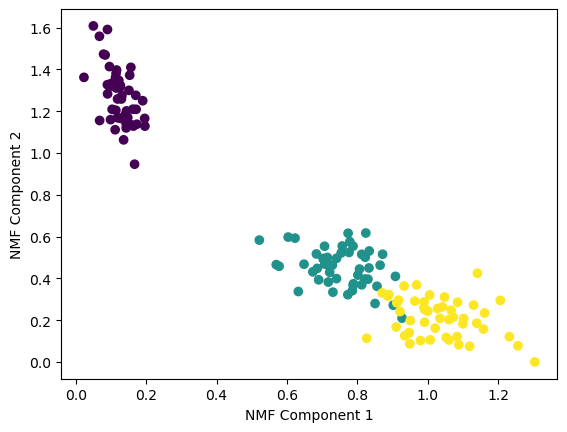

In [8]:
from sklearn.datasets import load_iris
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_f = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_f)
iris_n = nmf.transform(iris_f)
plt.scatter(x=iris_n[:,0], y=iris_n[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

#### SVD vs. NMF

- 수학적 공식:

    - SVD: Singular Value Decomposition은 행렬을 U, Σ 및 V^T의 세 가지 개별 행렬로 분해합니다. 행렬 Σ는 양수, 0 또는 음수일 수 있는 특이값을 포함
    - NMF: 음수가 아닌 행렬 분해는 음수가 아닌 행렬을 두 개의 음수가 아닌 행렬인 W와 H로 분해. W와 H는 둘 다 음수가 아닌 요소로 구성. NMF는 텍스트 데이터 또는 스펙트로그램과 같이 데이터에 음수가 아닌 제약 조건이 있는 응용 프로그램에 적합

- 해석 가능성:

    - SVD: SVD는 인수분해 행렬에 제약을 두지 않으며 양수 요소와 음수 요소를 모두 허용하여 SVD를 통해 추출된 요인의 해석은 요인 요소의 기호가 의미에 영향을 줄 수 있으므로 더 어려울 수 있다.
    - NMF: NMF의 비음성 제약은 향상된 해석성을 제공. NMF가 일반적으로 사용되는 주제 모델링과 같은 응용 프로그램에서 부정적이지 않은 요소는 종종 더 직관적이고 의미 있는 해석이 가능

- 활용:

    - SVD: SVD는 이미지 압축, 협업 필터링 및 차원 감소를 포함하여 광범위한 응용 프로그램을 가지고 있어서 기능 간의 양의 상관 관계와 음의 상관 관계를 모두 캡처하는 것이 중요할 때 특히 유용
    - NMF: NMF는 텍스트 마이닝, 이미지 처리, 오디오 신호 처리 및 생물 정보학에서 음수가 아닌 데이터를 처리할 때와 요인의 해석 가능성이 필요할 때 유용

SVD와 NMF는 둘 다 유용한 행렬 분해 기법이지만 SVD는 양수 및 음수 값을 처리할 수 있고 응용 범위가 더 넓은 반면 NMF는 음수가 아닌 데이터용으로 특별히 설계되었으며 향상된 해석성을 제공. 두 기술 중 선택은 데이터의 특성, 문제의 특정 요구 사항 및 추출된 요소의 원하는 해석 가능성에 따라 달라진다.